# Handwritten digits / 手書き数字

## Dataset: MNIST / データセット：MNIST

In this section, we will be using the Modified National Institute of Standards and Technology database (MNIST).
<br>
It is a database of handwritten digits that is commonly used in the field of machine learning.
<br>
Below are a few digit examples.

このセクションでは、Modified National Institute of Standards and Technology（MNIST）のデータベースを使用します。
<br>
手書き数字のデータベースであり、機械学習の分野で一般的に使用されています。
<br>
数桁の例を以下に示します。

<img style="display:inline" src="./img/2.png" width="40">
<img style="display:inline" src="./img/6.png" width="40">
<img style="display:inline" src="./img/7.png" width="40">
<img style="display:inline" src="./img/8.png" width="40">
<img style="display:inline" src="./img/9.png" width="40">

This dataset is often used to illustrate classification tasks.
The "goal" is to classify an image in the corresponding digit category:
- the observation is an image
- the label/class is the digit

このデータセットは、分類タスクを説明するためによく使用されます。
「目標」は、画像を対応する数字のクラスに分類することです。
- 観察は画像です
- ラベル/クラスは数字です

For example, when presented with the image
<br>
たとえば、分類器に次の画像を当てれば

<img style="display:inline" src="./img/2.png" width="40">

the classifier should answer `2`.
<br>
数字`2`を出力します。

In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

#### Getting the data / データの取得

We provide a wrapper class `MNISTVectorLoader` to make loading of the MNIST data easier.
<br>
(The class uses the `tensorflow.keras` package, about which we will talk more in the next practice day.)


MNISTデータの読み込みを簡単にするために、ラッパークラス`MNISTVectorLoader`を提供しています。
<br>
（このクラスは`tensorflow.keras`というパッケージを使用します。これについては、次の実習日で詳しく説明します。）

In [2]:
from mnist_loader import MNISTVectorLoader
# the parameter (43) is used to initialize the random generator in the object - change it to get a different set
mnist_vector_loader = MNISTVectorLoader(43) 

11493376/11490434 [==============================] - 643s 56us/step


Training classification algorithms may take a long time for large dataset. MNIST contains `70000` samples.
<br>
Here, we will use a limited part of the dataset.

大規模なデータセットの場合、分類アルゴリズムのトレーニングには時間がかかる場合があります。MNISTデータセットには`70000`サンプルが含まれています。
<br>
ここでは、データセットの一部だけを使用します。

The method `samples` gives features `X` and labels `y`.

メソッド`samples`は特徴`X`とラベル`y`を出力します。

In [4]:
X, y = mnist_vector_loader.samples(1000) # load 1000 samples

#### Exploring the data / データの探索

A data point is represented by a vector of length 784 and a scalar label.

一つのデータのサンプルは、長さ784のベクトルとスカラーのラベルで表されます。

In [5]:
print("Feature shape:", X.shape)
print("Label shape:", y.shape)
number_samples = X.shape[0]

Feature shape: (1000, 784)
Label shape: (1000,)


The vector of size 784 corresponds to a 28x28 image stored as a vector (it is referred to as a __feature vector__).

サイズ784のベクターは、28x28の画像に対応します（これは__特徴ベクター__とも呼ばれます）。

To avoid repeating code, we will define a helper function for plotting the digit.

コードの繰り返しを避けるために、ここで数字をプロットするための関数を定義します。

In [6]:
def plot_digit(features):
    # features is a vector of shape (784,)
    # numpy reshape method to transform the vector in a 2D array of shape (28, 28)
    image = features.reshape(28, 28)
    # matplotlib function to show an image
    plt.figure()
    plt.imshow(image, cmap = mpl.cm.binary, interpolation="nearest")
    plt.axis("off")

Let us plot the first digit in the dataset and the associated label.

データセットの最初の数字と関連するラベルをプロットしてみましょう。

label: 7
Feature as an image:


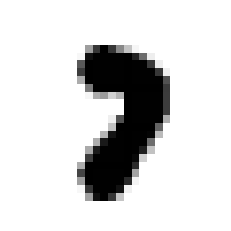

In [7]:
i = 0
print("label:", y[i])
print("Feature as an image:")
plot_digit(X[i])

Let's plot a 6.

数字 6 をプロットしましょう。

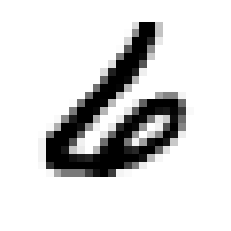

In [8]:
for i in np.arange(y.shape[0]): 
    if y[i] == 6:
        plot_digit(X[i])
        break

## Data preparation / データの準備

Next, we divide the dataset in a training set (70% of data) and a testing set (rest).

次に、データセットをトレーニングセット（データの70％）とテストセット（残りのデータ）に分割します。

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test  = train_test_split(X, y, test_size=0.25)

print("Training set size:", X_train.shape[0])
print("Testing set size:", X_test.shape[0])

Training set size: 750
Testing set size: 250


In [10]:
print(X_train.shape[0]/X_test.shape[0])

3.0


## Try  it yourself ! / 自分で試そう！

[Click here](session5-playground1.ipynb) to open a sample notebook and play with spliting the dataset.

[ここをクリックして](session5-playground1.ipynb)、サンプルのノートブックを開き、データセットの分割を試してください。

Let us also apply standardization using the `StandardScaler`.

`StandardScaler`を使用して標準化も適用しましょう。

In [11]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(X_train)

X_train_raw = X_train
X_train = scaler.transform(X_train_raw)

X_test_raw = X_test
X_test = scaler.transform(X_test_raw)

## Classification / 分類

Now we have a training set `(X_train, y_train)` and a testing set `(X_test, y_test)`, the next step is to create a classifier.
<br>
Let us try another classifier from `sklearn`. This time, we will  be using the `SGDClassifier` from the package `sklearn.linear_model`.
This classifer uses a model similar to the one of `LinearSVC`, but it is often faster to train.

(_SGD_ stands for "stochastic gradient descent", but we will not discuss further here what that means exactly.)


これで、トレーニングセット `（X_train、y_train）`とテストセット `（X_test、y_test）`ができました。次のステップは、分類子を作成することです。
<br>
`sklearn`の別の分類器を試してみましょう。今回は、`sklearn.linear_model`パッケージの`SGDClassifier`を使用します。
この分類器は、`LinearSVC`に類似したモデルを使用していますが、データが多い場合トレーニングがより早いです。

（_SGD_は「確率的勾配降下法」の英語名省略ですが、これが正確に何を意味するかについては、ここではこれ以上説明しません。）

Define the classifier
<br>
分類器を定義してから

In [12]:
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(max_iter = 1000, tol =  1e-3)

and train it.
<br>
トレーニングさせます。

In [13]:
sgd_classifier.fit(X_train, y_train); 

Note that this classifier has the same `fit` method as the `LinearSVC`.
<br>
この分類器は `LinearSVC`と同じく`fit`関数を持っています。

Now that the classifier has been trained on the training set, let us use the testing set to check the performance.
<br>
The `predict` function gives the predicted value for an observation.

分類器がトレーニングセットでトレーニングされたので、テストセットを使用してパフォーマンスを確認します。
<br>
`predict`関数は観測値に対してラベルの予測を計算します。

Digit label: 6
Prediction: 6
This is a correct prediction


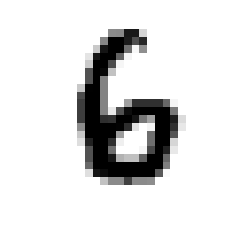

In [14]:
i = 8
plot_digit(X_test_raw[i])

# Show the truth
print("Digit label:", y_test[i])

# Using predict method
y_pred = sgd_classifier.predict([X_test[i]])[0]
print("Prediction:", y_pred)

# Check the prediction
if y_pred == y_test[i]:
    print("This is a correct prediction")
else:
    print("This is not a correct prediction")    

Let us check the _confusion matrix_.
<br>
_混同行列_を見てみましょう。

In [15]:
# Let predict for all samples
y_test_pred = sgd_classifier.predict(X_test)

from sklearn.metrics import confusion_matrix
CM = confusion_matrix(y_test, y_test_pred)
print(CM)

[[20  0  0  0  0  2  1  0  0  0]
 [ 0 33  1  0  0  0  0  0  1  0]
 [ 0  0 24  0  0  0  2  0  0  0]
 [ 0  0  2 23  0  2  0  1  1  0]
 [ 0  0  0  0 18  1  2  0  0  1]
 [ 0  1  0  1  0 15  1  0  0  0]
 [ 0  0  0  0  0  1 24  0  0  0]
 [ 0  0  0  0  1  0  0 18  0  1]
 [ 1  0  0  1  0  4  0  0 20  0]
 [ 1  0  0  0  3  1  0  2  0 19]]


In this case, the confusion matrix is a `10x10` matrix.

この場合、混同行列は大きさ 10x10 の行列です。

For larger confusion matrices, showing a figure of the matrix where the color corresponds to the count is a convenient representation.

大きい混同行列の場合、数を色で表した行列の図を表示すると便利です。

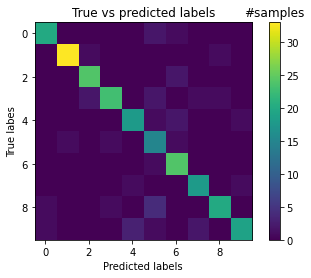

In [16]:
plt.imshow(CM)
plt.xlabel("Predicted labels")
plt.ylabel("True labes")
plt.title("True vs predicted labels")
cbar = plt.colorbar()
cbar.ax.set_title("#samples", rotation=0);

#### Saving the learned classifier / 学習した分類子の保存

We would like to use the results in other notebooks too. So let us save the testing set, the trained scaler and the trained classifier to a file.
<br>
We will use the `gzip` and `pickle` libraries.

ここで得た分類器などを他のノートブックにも使用できれば便利です。テストセット、トレーニング済みのスケーラーと、トレーニング済みの分類器をファイルに保存しましょう。
<br>
`gzip`と`pickle`ライブラリを使用します。

In [17]:
import gzip
import pickle
output_file = "./data/mnist_classification.pkl.gz"
with gzip.open( output_file, "wb") as fp:
    pickle.dump([X_test, y_test, scaler, sgd_classifier], fp)

## Try  it yourself ! / 自分で試そう！

Up to now the testing data were also from the MNIST dataset.
<br>
To challenge the classifier, let us try to recognize some handwritten digits that are not from MNIST.

[Click here](session5-playground2.ipynb) to open a sample notebook and write digits by yourself to test the classifier.

これまでのところ、テストはMNISTデータセットから得られたものでした。
<br>
分類器により難しいテストを与えるために、MNISTからではない手書きの数字を使ってみましょう。

[ここをクリックして](session5-playground2.ipynb)、サンプルのノートブックを開き、自分が書いた数字の分類を行ってみてください。

---


## Try  it yourself ! / 自分で試そう！ (Optional)

[Click here](session5-playground3.ipynb) to open a sample notebook to see how the quality of the dataset influences the results.

[ここをクリックして](session5-playground2.ipynb)、サンプルのノートブックを開き、データセットの品質が結果にどのように影響するかを確認しましょう。